# Remove the instrumental response and plot PPSD

In [2]:
from obspy.io.xseed import Parser
from obspy import read
from obspy import Stream
import matplotlib.pyplot as plt
import os
from scipy.fft import fft, fftfreq
import numpy as np
import icequake_processing
import importlib
importlib.reload(icequake_processing)

<module 'icequake_processing' from '/home/vic18joh/notebooks/sta-lta-detection-method/icequake_processing.py'>

In [2]:
st = read('/data/fast1/time/TIME_WAIS_2000_20190105_20190116.mseed')
st = st.select(component = "Z")
print(st)

9 Trace(s) in Stream:
2E.2000..GPZ | 2019-01-07T01:57:46.809998Z - 2019-01-07T23:59:59.999998Z | 1000.0 Hz, 79333191 samples
2E.2000..GPZ | 2019-01-07T23:59:59.999999Z - 2019-01-08T23:59:59.999999Z | 1000.0 Hz, 86400001 samples
2E.2000..GPZ | 2019-01-08T23:59:59.999999Z - 2019-01-09T23:59:59.999999Z | 1000.0 Hz, 86400001 samples
2E.2000..GPZ | 2019-01-09T23:59:59.999999Z - 2019-01-10T23:59:59.999999Z | 1000.0 Hz, 86400001 samples
2E.2000..GPZ | 2019-01-10T23:59:59.999999Z - 2019-01-11T23:59:59.999999Z | 1000.0 Hz, 86400001 samples
2E.2000..GPZ | 2019-01-11T23:59:59.999999Z - 2019-01-12T23:59:59.999999Z | 1000.0 Hz, 86400001 samples
2E.2000..GPZ | 2019-01-12T23:59:59.999999Z - 2019-01-13T23:59:59.999999Z | 1000.0 Hz, 86400001 samples
2E.2000..GPZ | 2019-01-13T23:59:59.999999Z - 2019-01-14T23:59:59.999999Z | 1000.0 Hz, 86400001 samples
2E.2000..GPZ | 2019-01-14T23:59:59.999999Z - 2019-01-15T00:55:56.999999Z | 1000.0 Hz, 3357001 samples


In [3]:
tr = st[0].copy()
t1 = tr.stats.starttime
print(t1)

2019-01-07T01:57:46.809998Z


### Open the pole and zero (PAZ) file

In [4]:
parser = Parser('/data/fast1/time/RESP.YE.N303.GPZ.1000SPS.12DB')
paz = parser.get_paz('GPZ')

/home/vic18joh/.local/lib/python3.9/site-packages/obspy/io/xseed/fields.py:377: UserWarning: Date is required.
  warnings.warn('Date is required.', UserWarning)


In [5]:
paz

{'zeros': [0j, 0j],
 'poles': [(-21.99+22.43j), (-21.99-22.43j)],
 'gain': 0.999813,
 'seismometer_gain': 76.7144,
 'digitizer_gain': 13421600.0,
 'sensitivity': 1029640000.0}

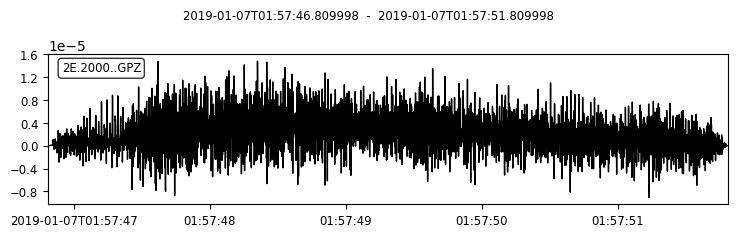

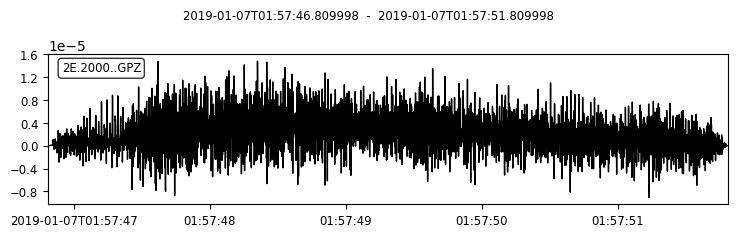

In [6]:
# os.makedirs("Plots_Response_Removed")
# name = str(tr)


tr = st[0].copy()
st_subset = Stream(tr)
st_subset.trim(t1, t1 + 5)
st_subset.simulate(paz_remove=paz)
st_subset.plot()
    
#     plt.savefig("Plots_Response_Removed/response removed %s.png" % name)

In [7]:
### Runs PPSD function with more steps.

In [8]:
### Runs PPSD function for longer time.

In [9]:
power, t = icequake_processing.power_time_series(st,paz)

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig = plt.figure()
fig.patch.set_facecolor('white')


plt.plot_date(t,power, "-")


In [ ]:
type(t[0])

In [ ]:

# run pts on rutford (and wais) more steps
# have subset apply to ppsd with or without paz (similar to pts)
# expand to longer time periods to look at noise levels 

### Runs power time series function with more steps.

In [ ]:
power, t = icequake_processing.power_time_series(st,paz, step = 1)


fig, ax = plt.subplots()
plt.plot_date(t,power, "-")

power, t = icequake_processing.power_time_series(st,paz, step = 0.5)


fig, ax = plt.subplots()
plt.plot_date(t,power, "-")

### Runs power time series function over longer time. 

In [ ]:
power, t = icequake_processing.power_time_series(st,paz, stop = 1e4, step = 5)
            

fig, ax = plt.subplots()
plt.plot_date(t,power, "-")

### Runs power series during time with least noise.

In [ ]:
power, t = icequake_processing.power_time_series(st,paz, start = 4800, stop = 5000 , step = 0.5)


fig, ax = plt.subplots()
plt.plot_date(t,power, "-")

In [ ]:
t[power.index(min(power))] - t[0]

In [ ]:
## To do
'''
figures:
trace from wais- no quakes
trace from rutford- yes quakes
slides from summer sta-lta

'''


In [ ]:
print(st.__str__(extended=True))

### Testing Code for PPSD.py

In [3]:
pth = "/data/fast1/time/"
dirs = os.listdir(pth)

for file in dirs:
    station_file = file
    #print(station_file)
len(dirs)

100

In [4]:
st_1940 = read(pth + "TIME_WAIS_1940_20190105_20190116.mseed")
st_1970 = read(pth + "TIME_WAIS_1970_20190105_20190116.mseed")
st_2000 = read(pth + "TIME_WAIS_2000_20190105_20190116.mseed")
st_20 = read(pth + "TIME_WAIS_20_20190105_20190116.mseed")
st_2030 = read(pth + "TIME_WAIS_2030_20190105_20190116.mseed")


In [8]:
st = st_2000.select(component = "Z")

In [36]:
from obspy.core import UTCDateTime
st_1 = st[1]
length = (st_1.stats.endtime - st_1.stats.starttime)
new_time = (st_1.stats.starttime + length/2)
date = new_time.date

for hour in np.arange(0,24):
    print("")
    print("hour is: " + str(hour))
    tr_0 = st[0].copy()
    st_chunk = Stream(tr_0)
    starttime = UTCDateTime(date.year,date.month,date.day,hour)
    endtime = starttime + (3600)
    st_subset.trim(starttime,endtime)
#     for j in np.arange(0,12):
#         tr = st_chunk.copy()
#         st_subset = Stream(tr)
#         start_1 = starttime + (j * 300)
#         print("     start time is: " + str(start_1))
#         end_1 = start_1 + 300
#         print("     end time is: " + str(end_1))
#         st_subset.trim(start_1,end_1)
    print("   start is : " + str(starttime))
    print("   end is : " + str(endtime))
    print(st_subset)


hour is: 0
   start is : 2019-01-07T00:00:00.000000Z
   end is : 2019-01-07T01:00:00.000000Z
0 Trace(s) in Stream:


hour is: 1
   start is : 2019-01-07T01:00:00.000000Z
   end is : 2019-01-07T02:00:00.000000Z
0 Trace(s) in Stream:


hour is: 2
   start is : 2019-01-07T02:00:00.000000Z
   end is : 2019-01-07T03:00:00.000000Z
0 Trace(s) in Stream:


hour is: 3
   start is : 2019-01-07T03:00:00.000000Z
   end is : 2019-01-07T04:00:00.000000Z
0 Trace(s) in Stream:


hour is: 4
   start is : 2019-01-07T04:00:00.000000Z
   end is : 2019-01-07T05:00:00.000000Z
0 Trace(s) in Stream:


hour is: 5
   start is : 2019-01-07T05:00:00.000000Z
   end is : 2019-01-07T06:00:00.000000Z
0 Trace(s) in Stream:


hour is: 6
   start is : 2019-01-07T06:00:00.000000Z
   end is : 2019-01-07T07:00:00.000000Z
0 Trace(s) in Stream:


hour is: 7
   start is : 2019-01-07T07:00:00.000000Z
   end is : 2019-01-07T08:00:00.000000Z
0 Trace(s) in Stream:


hour is: 8
   start is : 2019-01-07T08:00:00.000000Z
   end is 